Problema de Laplace

\begin{equation*}
  \begin{cases}
    \nabla^2 U = 0 &\text{ para } \Omega\\
    U = 0 &\text{ para } \partial\Omega_{A, B, C}\\
    U = sen(2 \pi x) &\text{ para } \partial\Omega_{D}\\
  \end{cases}
\end{equation*}

Utilizando a matriz completa $M^2 \times M^2$

I [[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
T [[ 1.  0.  0. ...  0.  0.  0.]
 [ 1. -4.  1. ...  0.  0.  0.]
 [ 0.  1. -4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  1.  0.]
 [ 0.  0.  0. ...  1. -4.  1.]
 [ 0.  0.  0. ...  0.  0.  1.]]
IxT = A1 [[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. -0.  0. ...  0.  0.  0.]
 [ 0.  0. -0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -0.  0.  0.]
 [ 0.  0.  0. ...  0. -0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
E2 [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]
E2xI = A2 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
D [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 

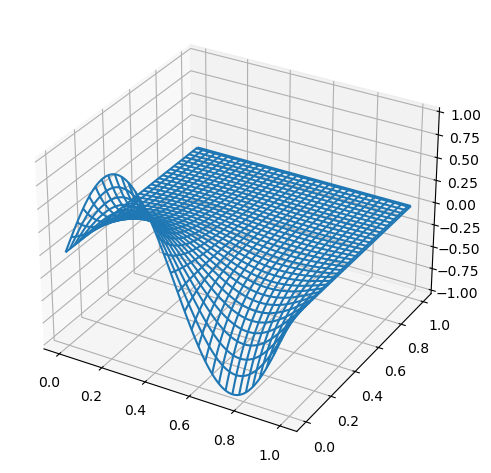

In [1]:
import matplotlib.pyplot as plt
import numpy as np


debug=True #True se quiser ver a impressao das matrizes que montam o sistema

h = 0.01
x = np.arange(0, 1+h/2, h)
y = np.arange(0, 1+h/2, h)

u_a = 0 #dirichilet em omega_a
u_b = 0 #dirichilet em omega_b
u_c = 0 #dirichilet em omega_c
u_d = np.sin(2*np.pi*x) #dirichilet em omega_d

tam = len(x)

#monta a matriz T para cada coluna do domínio
T = np.zeros((tam, tam))
T[0,0] = 1
T[0,1] = 0

for i in range(1, tam-1):
    T[i,i] = -4
    T[i,i+1] = 1
    T[i,i-1] = 1

T[tam-1, tam-1] = 1
T[tam-1, tam-2] = 0

I = np.eye(tam)
I[0] = 0
I[-1] = 0

A1 = np.kron(I, T)

e2 = np.diag(np.ones(tam-1), -1) + np.diag(np.ones(tam-1), 1)
e2[0,1] = 0
e2[-1,-2] = 0

A2 = np.kron(e2, I)

D = np.eye(tam)
e3 = np.diag(np.ones(tam))
e3[1:-1, 0:] = 0

A3 = np.kron(e3, D)

#matriz A final
A = A1 + A2 + A3

if debug:
    print("I", I)
    print("T", T)
    print("IxT = A1", A1)
    print("E2", e2)
    print("E2xI = A2", A2)
    print("D", D)
    print("E3", e3)
    print("E3xD = A3", A3)
    print("A1+A2+A3 = A", A)

f = np.zeros(tam*tam)

for i in range(tam):
    f[i+0*tam] = u_a #direita
    f[i + (tam-1)*(tam)] += u_b#esquerda
    f[(tam-1) + i*(tam)] += u_c # cima
    f[0 + i*(tam)] += u_d[i] #baixo

u_sl = np.linalg.solve(A, f)

u=np.zeros((tam, tam))

x, y = np.meshgrid(x, y)

for i in range(tam):
    for j in range(tam):
        ii=i
        jj=j
        u[i,j] = u_sl[ii + tam*jj]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')  # Use add_subplot to create a 3D axes
ax.plot_wireframe(x, y, u)
plt.tight_layout()
plt.show()